<a href="https://colab.research.google.com/github/rishabh-sachdev/econometrics/blob/main/Econometrics_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Import the data
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [108]:
# Clean the data

df = data.copy()[0:1000]
df = df[np.abs(stats.zscore(df['median_house_value'])) < 3]

df.index = df.index + 1 # to match week number



df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
2,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Coefficient of correlation 0.7583404870189585


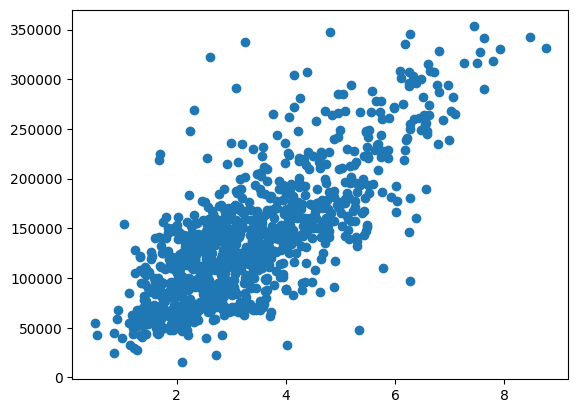

In [109]:
predict_y = df['median_house_value'] # variable you're predicting
dependent_X = df['median_income'] # variables you're using to predict
# print(dependent_X)

plt.scatter(dependent_X, predict_y)

print("Coefficient of correlation", dependent_X.corr(predict_y))

#total_rooms : 0.54
#total_bedrooms : 0.43
#median_income : 0.75

In [126]:
# Run SKLearn Linear Regression Model
from sklearn import linear_model
import statsmodels.api as sm

predict_y = 'median_house_value' # variable you're predicting
dependent_X = ['median_income'] # variables you're using to predict

y = df[predict_y]
X = df[dependent_X]

model = linear_model.LinearRegression()
m1 = sm.OLS(y,X).fit()
# model.fit(X, y)

# r_sq = round(m1.score(X, y), 2)
# print('R-squared', r_sq)

In [128]:
# # Print coefficients
# for n in range(len(X.columns)):
#     print(X.columns[n], round(model.coef_[n], 2))

# print('intercept', round(model.intercept_, 2))

In [130]:
# Make predictions
df['forecast'] = m1.predict(df[dependent_X])
df['forecast'] = df['forecast'].round().astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,forecast
1,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,60373
2,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,73566
3,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,66731
4,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,129011
5,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,77810


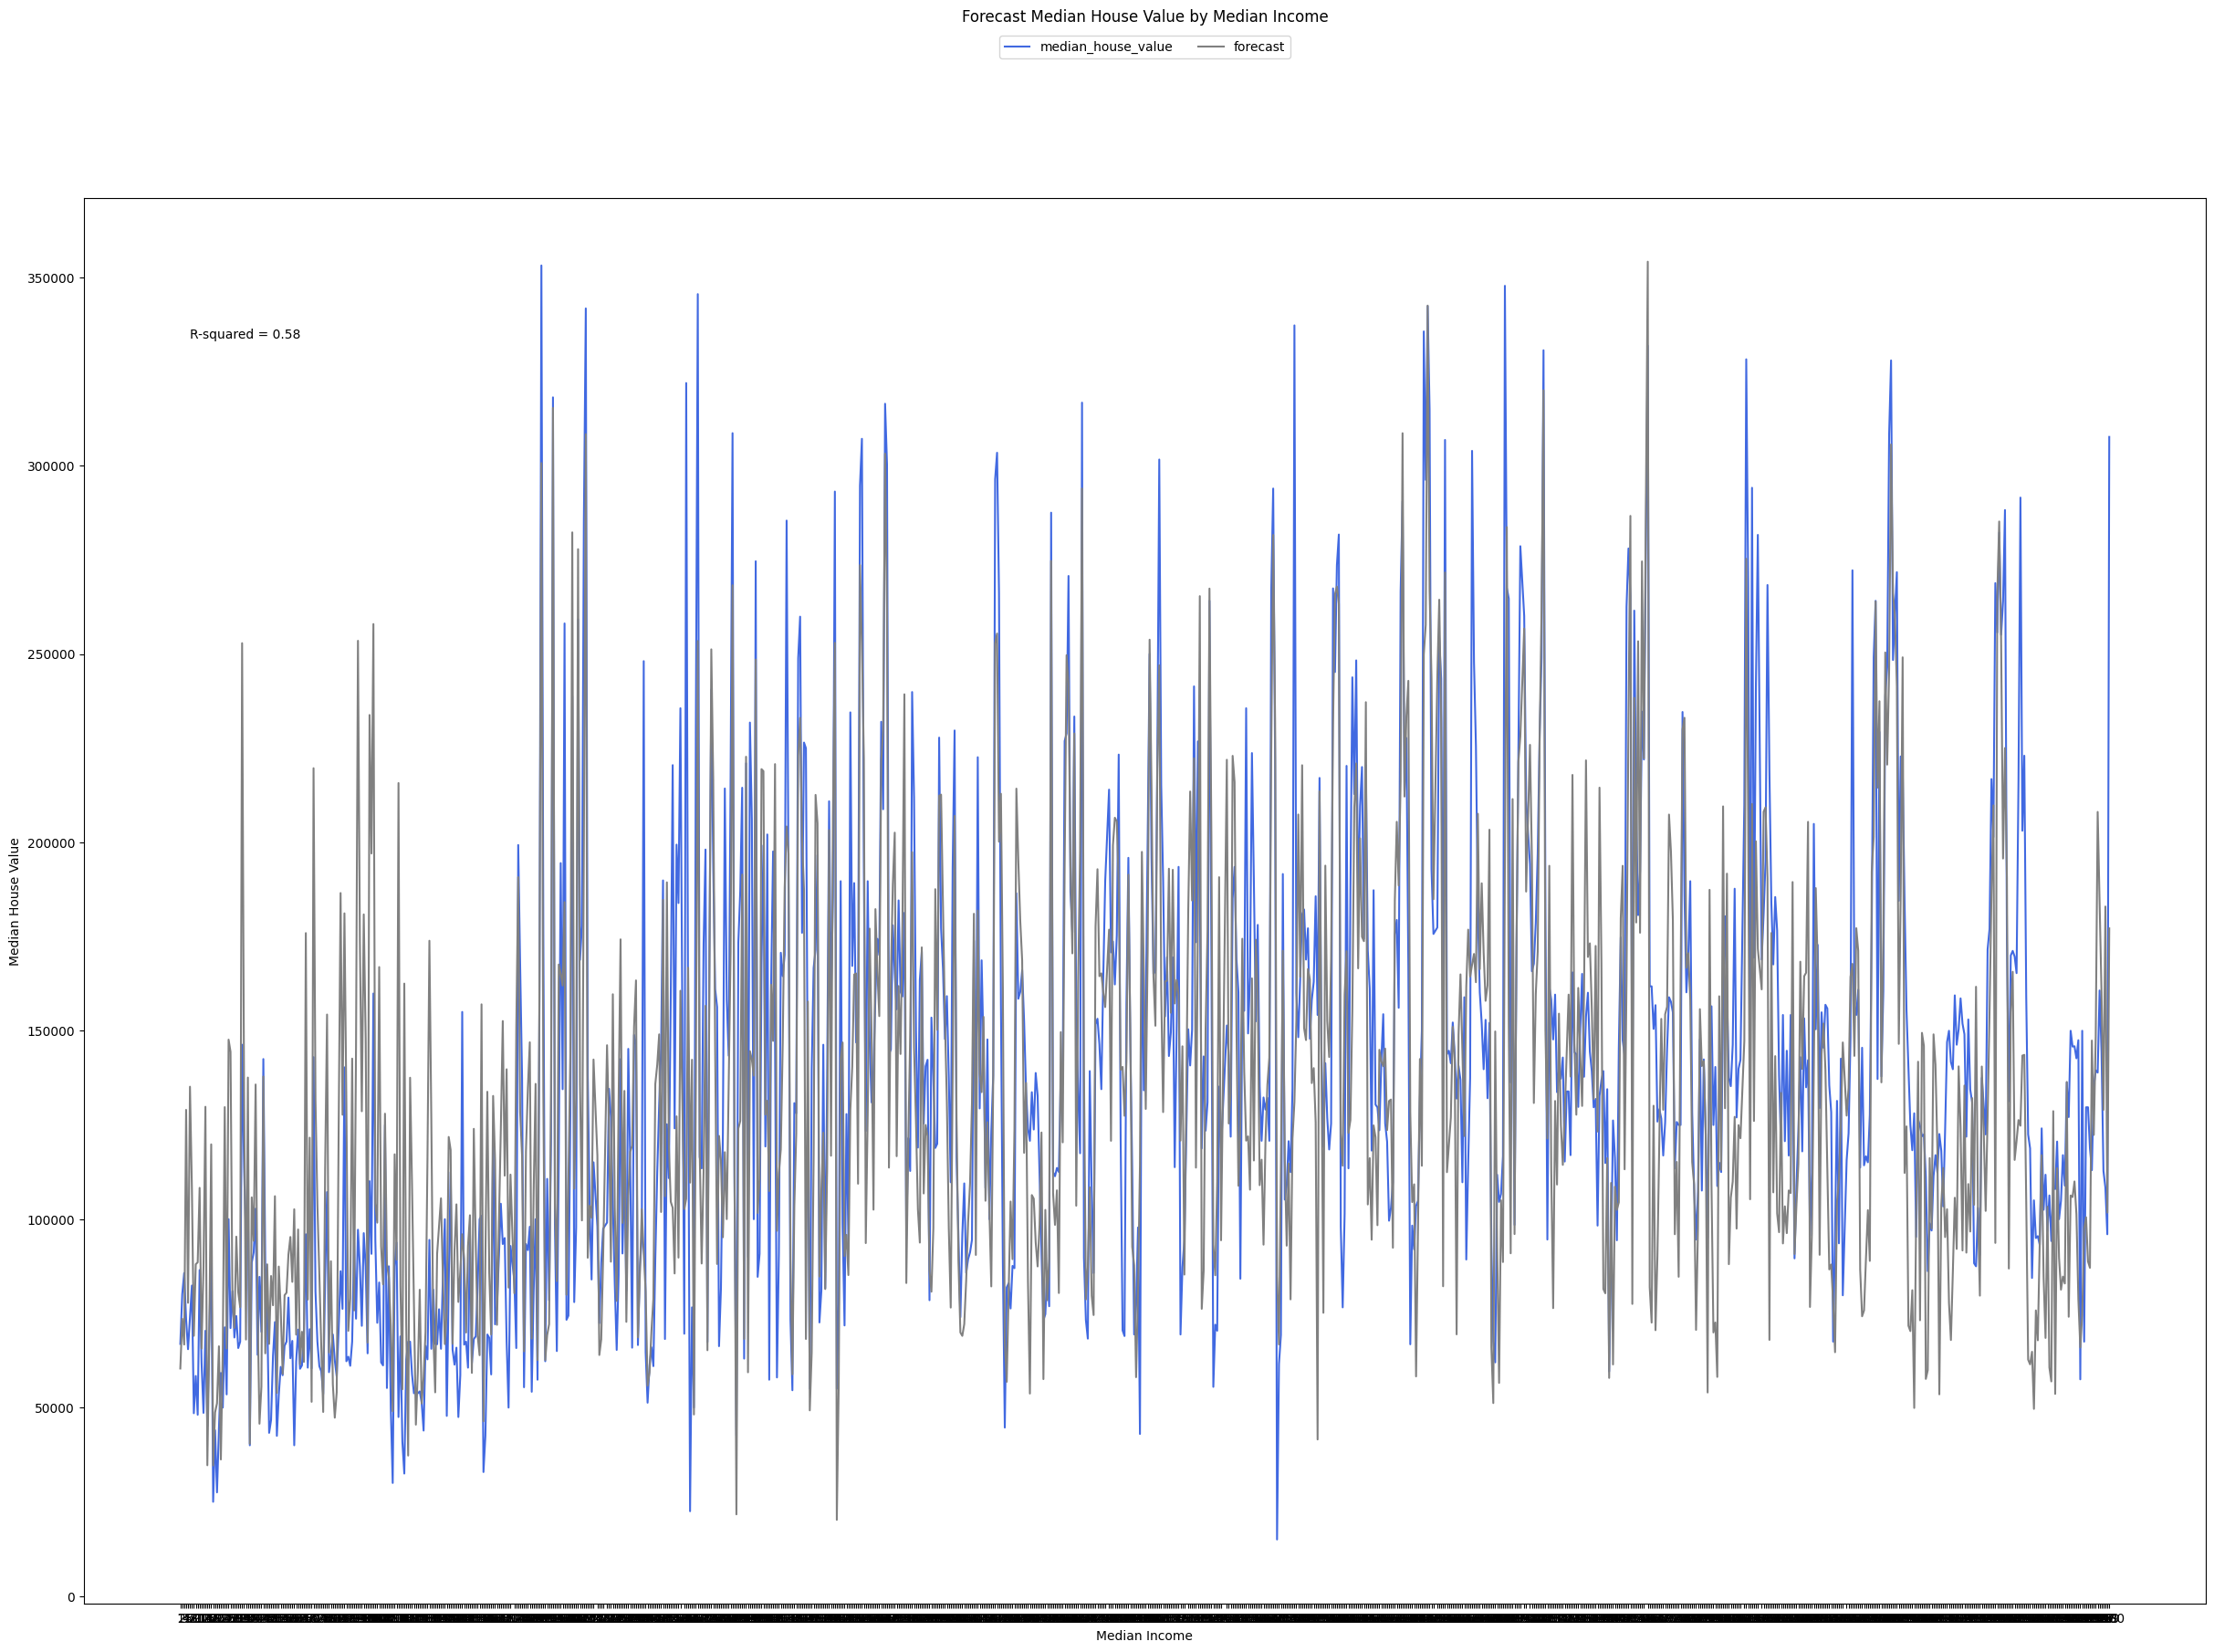

In [131]:
# Plot Line Chart
import matplotlib.pyplot as plt

df.plot(y=['median_house_value', 'forecast'], kind='line', color=['royalblue', 'grey'], figsize=(30,20))

plt.title('Forecast Median House Value by Median Income', y=1.12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.annotate(f'R-squared = {r_sq}', xy=(0.05, 0.90), xycoords='axes fraction')

plt.xlabel('Median Income')
plt.xticks(df.index) # force all x values to show
plt.ylabel('Median House Value')

plt.show();

In [143]:
# Function to run econometric analysis in one go
def run_econometrics(df, predict_y, dependent_X):
    y = df[predict_y]
    X = df[dependent_X]
    X = sm.add_constant(X)

    # model = linear_model.LinearRegression()

    # results = m1.OLS.fit(y, X)

    m1 = sm.OLS(y,X).fit()

    print("Summary", m1.summary())
    # r_sq = round(model.score(X, y), 2)
    # print('R-squared:', r_sq)

    # print('Coefficients:')
    # for n in range(len(X.columns)):
        # print('• '+X.columns[n], round(model.coef_[n], 2))

    # print('• intercept', round(model.intercept_, 2))

    df['forecast'] = m1.predict(X)
    df['forecast'] = df['forecast'].round().astype(int)

    df.plot(y=[predict_y, 'forecast'], kind='line', color=['royalblue', 'grey'], figsize=(10,5))

    variable_names = ', '.join([var for var in X.columns])

    plt.title(f'Forecast {predict_y} by {variable_names}', y=1.12)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)
    plt.annotate(f'R-squared = {r_sq}', xy=(0.05, 0.90), xycoords='axes fraction')

    plt.xlabel('Median House Income')
    plt.xticks(df.index) # force all x values to show
    plt.ylabel(predict_y)

    plt.show();

    return df



Summary                             OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1330.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          6.89e-185
Time:                        18:37:46   Log-Likelihood:                -11874.
No. Observations:                 985   AIC:                         2.375e+04
Df Residuals:                     983   BIC:                         2.376e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.501e+04   3404.614   

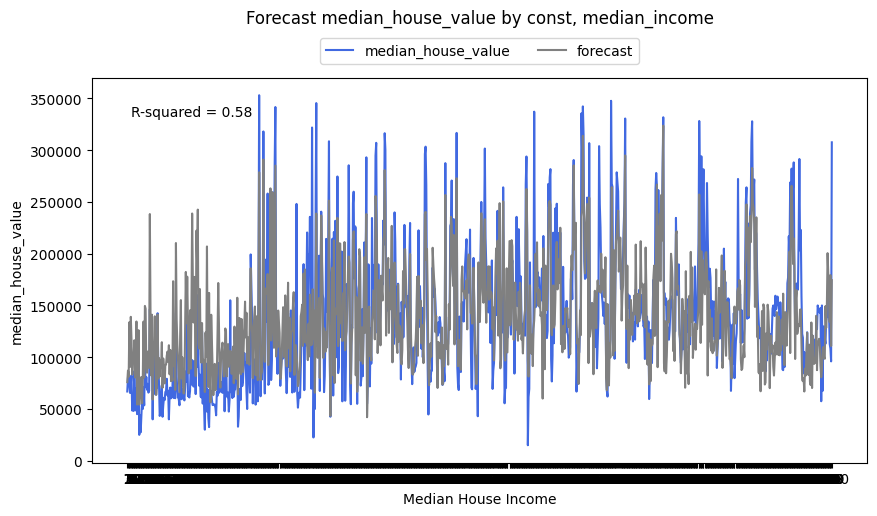

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,forecast
1,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,75938
2,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,87067
3,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,81302
4,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,133837
5,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,90647


In [144]:
run_econometrics(df, 'median_house_value', ['median_income']).head()

In [ ]:
# Function for calculating adstocks https://pythonplotscience.blogspot.com/2017/08/a-simple-advertising-adstock.html
def adstocked_advertising(adstock_rate, advertising):
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0:
            adstocked_advertising.append(advertising.iloc[i])
        else:
            adstocked_advertising.append(round(advertising.iloc[i] + adstock_rate * adstocked_advertising[i-1], 1))
    return adstocked_advertising

df['adstocks'] = adstocked_advertising(adstock_rate=0.15, advertising=df['ads'])
df.head()

,sales,price,ads,holiday,forecast,adstocks
1,350,5.5,3.3,0,414,3.3
2,460,7.5,3.3,1,364,3.8
3,350,8.0,3.0,0,329,3.6
4,430,8.0,4.5,1,440,5.0
5,350,6.8,3.0,0,359,3.8


R-squared: 0.84
Coefficients:
• price -17.74
• adstocks 20.52
• holiday 86.64
• intercept 392.9


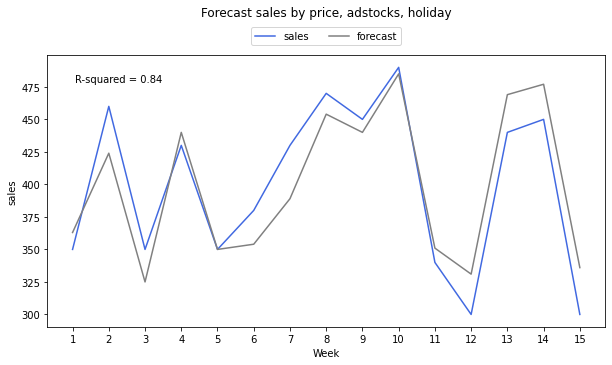

,sales,price,ads,holiday,forecast,adstocks
1,350,5.5,3.3,0,363,3.3
2,460,7.5,3.3,1,424,3.8
3,350,8.0,3.0,0,325,3.6
4,430,8.0,4.5,1,440,5.0
5,350,6.8,3.0,0,350,3.8


In [ ]:
run_econometrics(df, 'sales', ['price', 'adstocks', 'holiday']).head()